In [5]:
import psycopg2
import sys
sys.path.append('..')
from utils.visualization import plot_top_counter_train
from utils.another import get_decoding

In [17]:
conn = psycopg2.connect(host="localhost", database="postgres", user="postgres", password="igsvemina1201")
cur = conn.cursor()

In [18]:
query0 = '''
    SELECT count(*) from tagged_bigram_counter
    '''
cur.execute(query0)
print(f'number of all bigram in train corpus: {cur.fetchone()[0]}')

number of all bigram in train corpus: 38065758


# POS-TAG analysis

In [19]:
query1 = "SELECT first_tag, second_tag, sum(tagged_bigram_count) as tags_count \
    FROM filtered_tagged_bigram_counter \
    GROUP BY (first_tag,second_tag) \
    ORDER BY tags_count DESC \
    LIMIT %(n_most_common)s;"

query2 = "SELECT first_gram, second_gram, tagged_bigram_count \
    FROM filtered_tagged_bigram_counter \
    WHERE first_tag = %(first_tag)s and second_tag = %(second_tag)s \
    ORDER BY tagged_bigram_count DESC \
    LIMIT %(n_most_common)s;"

JJR, Adjective, comparative
NNS, Noun, plural
JJS, Adjective, superlative
NN, Noun, singular or mass
JJ, Adjective


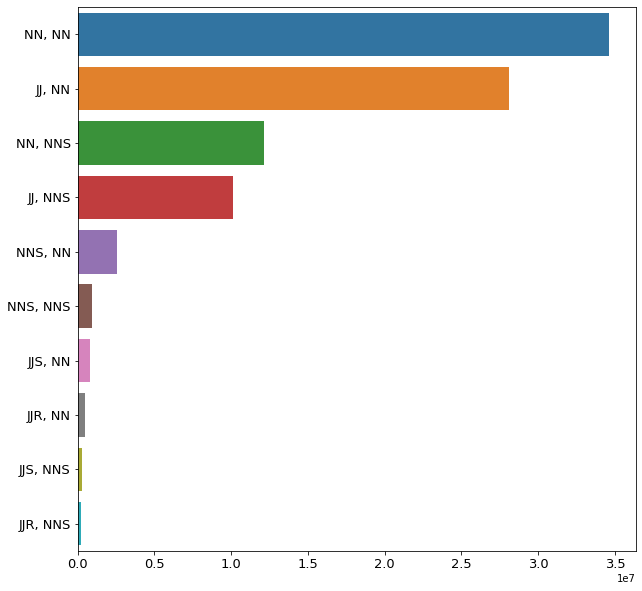

In [20]:
cur.execute(query1,{'n_most_common':10})
most_common_tags = cur.fetchall()
first_tags, second_tags, _ = zip(*most_common_tags)
decoded_tags = get_decoding(set(first_tags+second_tags))
for tag in decoded_tags:
    print(tag)
plot_top_counter_train(most_common_tags)

In [21]:
for tag in most_common_tags:
    cur.execute(query2, {'first_tag':tag[0],'second_tag':tag[1],'n_most_common':10})
    most_common_ngrams = cur.fetchall()
    print(f' MOST COMMON NGRAM FOR TAGS', *tag[:-1])
    for ngram in most_common_ngrams:
        print(ngram)

 MOST COMMON NGRAM FOR TAGS NN NN
('barack', 'obama', 102408)
('health', 'care', 84637)
('i', 'don', 80936)
('wall', 'street', 62281)
('web', 'site', 55670)
('climate', 'change', 51754)
('vice', 'president', 48957)
('south', 'africa', 45010)
('president', 'barack', 44005)
('president', 'obama', 43593)
 MOST COMMON NGRAM FOR TAGS JJ NN
('new', 'york', 357822)
('last', 'year', 277278)
('last', 'week', 170112)
('prime', 'minister', 138932)
('last', 'month', 113458)
('white', 'house', 107802)
('first', 'time', 100165)
('chief', 'executive', 94216)
('next', 'year', 71877)
('north', 'korea', 47075)
 MOST COMMON NGRAM FOR TAGS NN NNS
('los', 'angeles', 122872)
('interest', 'rates', 33330)
('oil', 'prices', 28362)
('york', 'times', 27205)
('security', 'forces', 26837)
('police', 'officers', 24144)
('told', 'reuters', 18826)
('dow', 'jones', 18162)
('family', 'members', 15879)
('capital', 'markets', 14418)
 MOST COMMON NGRAM FOR TAGS JJ NNS
('united', 'states', 255761)
('human', 'rights', 51774

# COLLOCATIONS

### T-TEST

In [22]:
query3 = '''
    SELECT * FROM bigram_student_t limit %(n_most_common)s'''
query4 = '''
    SELECT * FROM bigram_student_t ORDER BY student_t limit %(n_most_common)s'''

In [23]:
cur.execute(query3,{'n_most_common':10})
most_common_tags = cur.fetchall()
print('Bigrams with max T-test value:')
for tag in most_common_tags:
    print(tag)

Bigrams with max T-test value:
('of', 'the', 'IN', 'DT', 1555.59598453628)
('in', 'the', 'IN', 'DT', 1521.17768826302)
(',', '``', ',', '``', 1283.37162010203)
('on', 'the', 'IN', 'DT', 913.699889199494)
(',', 'but', ',', 'CC', 910.246443923727)
(',', 'which', ',', 'WDT', 903.228640400838)
('to', 'be', 'TO', 'VB', 897.366555011852)
('said', '.', 'VBD', '.', 872.3608500006)
('for', 'the', 'IN', 'DT', 867.675709727457)
('at', 'the', 'IN', 'DT', 862.329977730739)


In [24]:
cur.execute(query4,{'n_most_common':10})
most_uncommon_tags = cur.fetchall()
print('Bigrams with min T-test value:')
for tag in most_uncommon_tags:
    print(tag)

Bigrams with min T-test value:
('the', "'s", 'DT', 'POS', -144040.042280984)
('of', "'s", 'IN', 'POS', -135949.05344934)
('the', '.', 'DT', '.', -127944.91986457)
('the', 'and', 'DT', 'CC', -101162.138791064)
('the', 'to', 'DT', 'TO', -82817.9473088413)
('the', ',', 'DT', ',', -82407.1708975399)
('and', "'s", 'CC', 'POS', -72939.5635323879)
('the', 'of', 'DT', 'IN', -61942.3990569159)
('to', 'of', 'TO', 'IN', -54733.9742951788)
('for', "'s", 'IN', 'POS', -52841.3934265577)


### MAX-likelihood test

In [25]:
query5 = '''
    SELECT * FROM bigram_max_likelihood limit %(n_most_common)s'''
query6 = '''
    SELECT * FROM bigram_max_likelihood ORDER BY max_likelihood limit %(n_most_common)s'''

In [26]:
cur.execute(query5,{'n_most_common':10})
most_common_tags = cur.fetchall()
print('Bigrams with max MAX-likelihood value:')
for tag in most_common_tags:
    print(tag)

Bigrams with max MAX-likelihood value:
('nyi', 'nyi', 'NNS', 'NNS', 11.0437887342104)
('nicolae', 'ceausescu', 'NNS', 'VBP', 10.8291185692212)
('nnamdi', 'asomugha', 'NNS', 'VBP', 10.7189558238738)
('natascha', 'kampusch', 'NNS', 'VBP', 10.7096822797449)
('geno', 'auriemma', 'NNS', 'VBP', 10.6261046673426)
('miki', 'ando', 'NNS', 'VBP', 10.6158855021609)
('vuk', 'jeremic', 'NNS', 'VBP', 10.5752676512527)
('masamichi', 'adachi', 'NNS', 'VBP', 10.5209099889301)
('minea', 'blomqvist', 'NNS', 'VBP', 10.4804813318745)
('nik', 'antropov', 'NNS', 'VBP', 10.4542847798265)


In [27]:
cur.execute(query6,{'n_most_common':10})
most_uncommon_tags = cur.fetchall()
print('Bigrams with min MAX-likelihood value:')
for tag in most_uncommon_tags:
    print(tag)

Bigrams with min MAX-likelihood value:
('of', "'s", 'IN', 'POS', -5.13337938266827)
('the', "'s", 'DT', 'POS', -4.80900497991861)
('for', "'s", 'IN', 'POS', -4.72298248018409)
('and', "'s", 'CC', 'POS', -4.62441284562445)
('has', "'s", 'VBZ', 'POS', -4.37030301266493)
('is', "'s", 'VBZ', 'POS', -4.34636592802184)
('mr', 'the', 'NN', 'DT', -4.28170739578698)
('with', "'s", 'IN', 'POS', -4.26131055552059)
('$', 'the', '$', 'DT', -4.2506856956663)
('an', 'with', 'DT', 'IN', -4.21284151091966)


### CHI-squared test

In [ ]:
query7 = '''
    SELECT * FROM bigram_chi_cquared limit %(n_most_common)s'''

In [ ]:
cur.execute(query7,{'n_most_common':10})
most_common_tags = cur.fetchall()
print('Bigrams with min CHI-squared value:')
for tag in most_common_tags:
    print(tag)

In [15]:
conn.commit()
cur.close()